<a href="https://colab.research.google.com/github/SofiaIPalladino/AI/blob/main/RedesFeedForward/EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7540 - loss: 1.0147 - val_accuracy: 0.9417 - val_loss: 0.3572
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9335 - loss: 0.3928 - val_accuracy: 0.9530 - val_loss: 0.2885
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9463 - loss: 0.3169 - val_accuracy: 0.9649 - val_loss: 0.2357
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9544 - loss: 0.2751 - val_accuracy: 0.9663 - val_loss: 0.2182
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9600 - loss: 0.2494 - val_accuracy: 0.9674 - val_loss: 0.2095
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9619 - loss: 0.2332 - val_accuracy: 0.9740 - val_loss: 0.1967
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9633 - loss: 0.2278 - val_accuracy: 0.9712 - val_loss: 0.1879
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9642 - loss: 0.2152 - val_accu

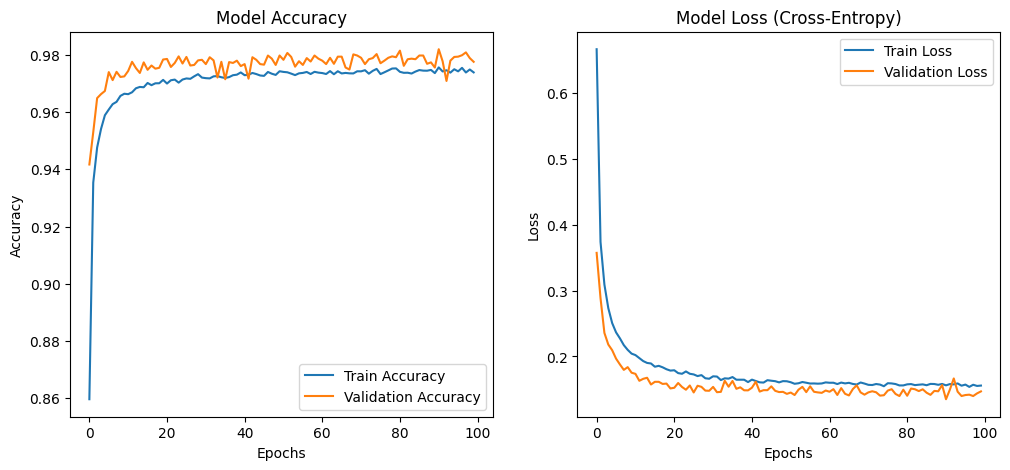

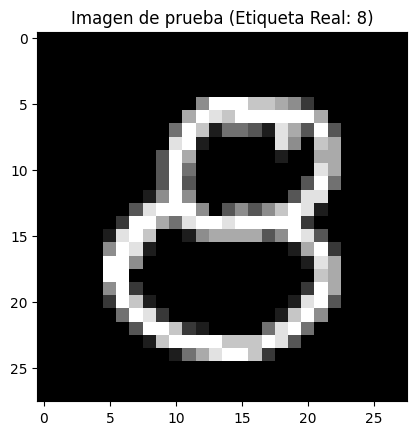

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicción del modelo: 8
Probabilidades de cada clase: [[5.7869975e-02 6.3535699e-05 2.8516247e-03 6.5499865e-02 8.4299812e-05
  1.6592003e-01 6.5272632e-03 5.9909787e-04 6.9883209e-01 1.7521919e-03]]


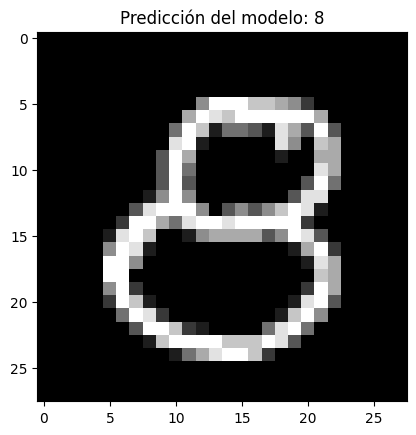

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import plot_model

# Cargar y preparar los datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos de imagen (dividiendo por 255)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Aplanar las imágenes (28x28) a vectores de 784 elementos
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

# Definir el modelo con regularización L2 y Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),  # Regularización L2
    layers.Dropout(0.2),  # Dropout para evitar el sobreajuste
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),  # Otro Dropout
    layers.Dense(10, activation='softmax')  # Capa de salida sin Dropout
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x_train, y_train_categorical, epochs=100, batch_size=128, validation_data=(x_test, y_test_categorical))

# Graficar los resultados de precisión y pérdida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de precisión (accuracy)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax1.legend()

# Gráfico de pérdida (loss)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss (Cross-Entropy)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# Visualizar la estructura del modelo
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Mostrar una imagen aleatoria de prueba y su predicción
index = np.random.randint(0, x_test.shape[0])

test_image = x_test[index].reshape(28, 28)

plt.imshow(test_image, cmap='gray')
plt.title(f'Imagen de prueba (Etiqueta Real: {y_test[index]})')
plt.show()

# Realizar predicción sobre la imagen de prueba
predicted_probs = model.predict(x_test[index].reshape(1, 784))
predicted_label = np.argmax(predicted_probs)

print(f"Predicción del modelo: {predicted_label}")
print(f"Probabilidades de cada clase: {predicted_probs}")

# Mostrar la imagen junto con la predicción del modelo
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicción del modelo: {predicted_label}')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3492 - loss: 2.2246 - val_accuracy: 0.7418 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 2/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6476 - loss: 1.0892 - val_accuracy: 0.7874 - val_loss: 0.6393 - learning_rate: 0.0010
Epoch 3/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7081 - loss: 0.9022 - val_accuracy: 0.8138 - val_loss: 0.5499 - learning_rate: 0.0010
Epoch 4/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7386 - loss: 0.8079 - val_accuracy: 0.8314 - val_loss: 0.5001 - learning_rate: 0.0010
Epoch 5/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7604 - loss: 0.7395 - val_accuracy: 0.8416 - val_loss: 0.4761 - learning_rate: 0.0010
Epoch 6/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7758 - loss: 0.6986 - val_accuracy: 0.8541 - val_loss: 0.4314 - learning_rate: 0.0010
Epoch 7/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7868 - loss: 0

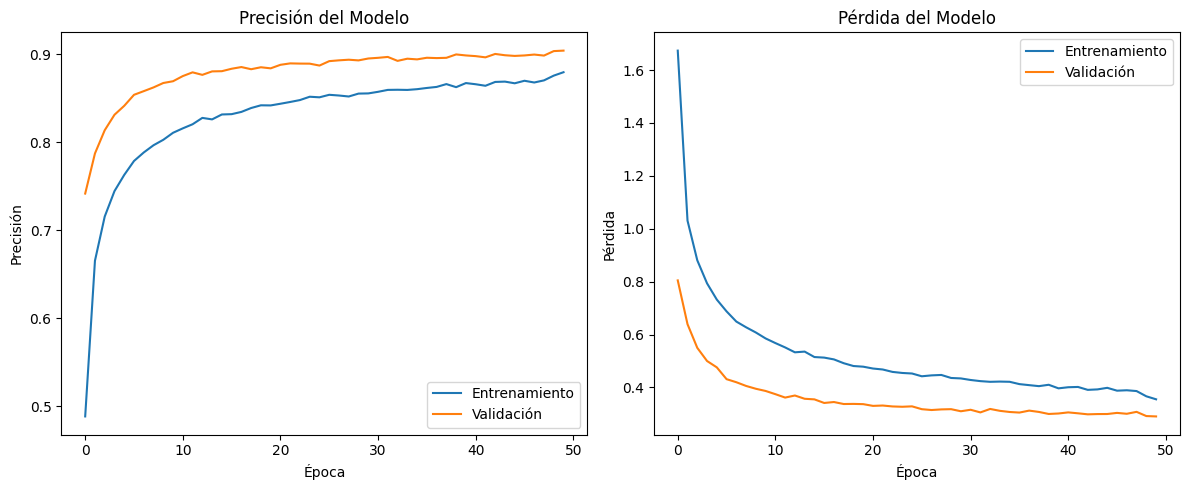

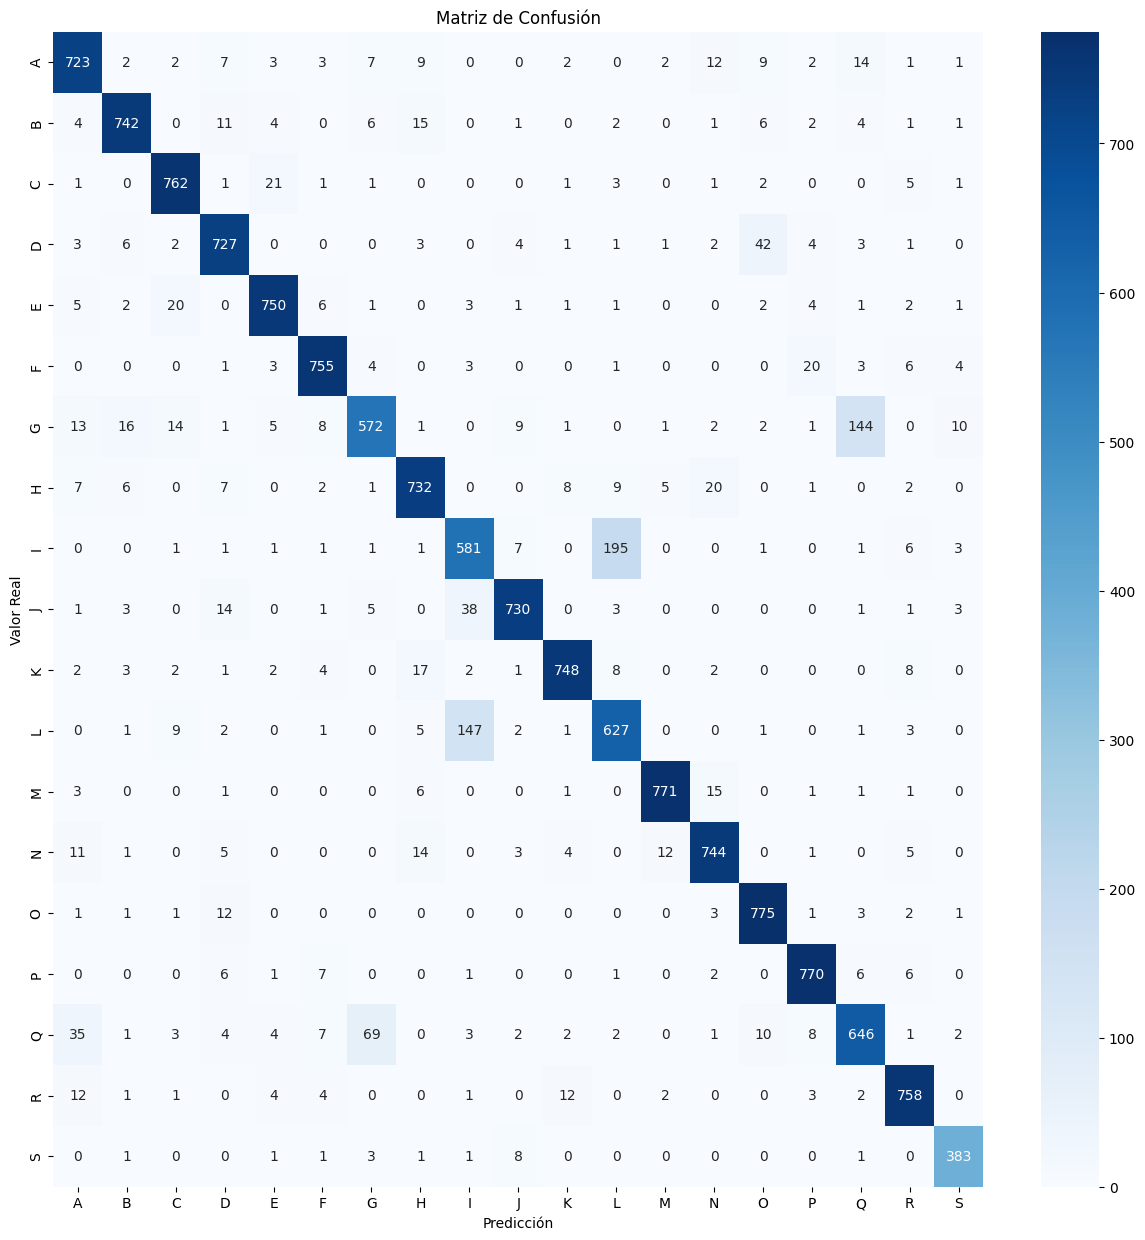


Ejemplos de predicciones:
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A
Verdadera: A, Predicha: A


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0] <= 19]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward (ajustado para 19 clases)
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(19, activation='softmax')  # 19 clases para A-S
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=50,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in range(10):  # Mostrar las primeras 10 predicciones
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5461 - loss: 1.5094 - val_accuracy: 0.8142 - val_loss: 0.5728 - learning_rate: 0.0010
Epoch 2/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7847 - loss: 0.6591 - val_accuracy: 0.8529 - val_loss: 0.4398 - learning_rate: 0.0010
Epoch 3/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8232 - loss: 0.5389 - val_accuracy: 0.8683 - val_loss: 0.3904 - learning_rate: 0.0010
Epoch 4/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8436 - loss: 0.4644 - val_accuracy: 0.8747 - val_loss: 0.3676 - learning_rate: 0.0010
Epoch 5/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8592 - loss: 0.4202 - val_accuracy: 0.8760 - val_loss: 0.3553 - learning_rate: 0.0010
Epoch 6/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8683 - loss: 0.3834 - val_accuracy: 0.8848 - val_loss: 0.3333 - learning_rate: 0.0010
Epoch 7/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8730 - loss: 0.

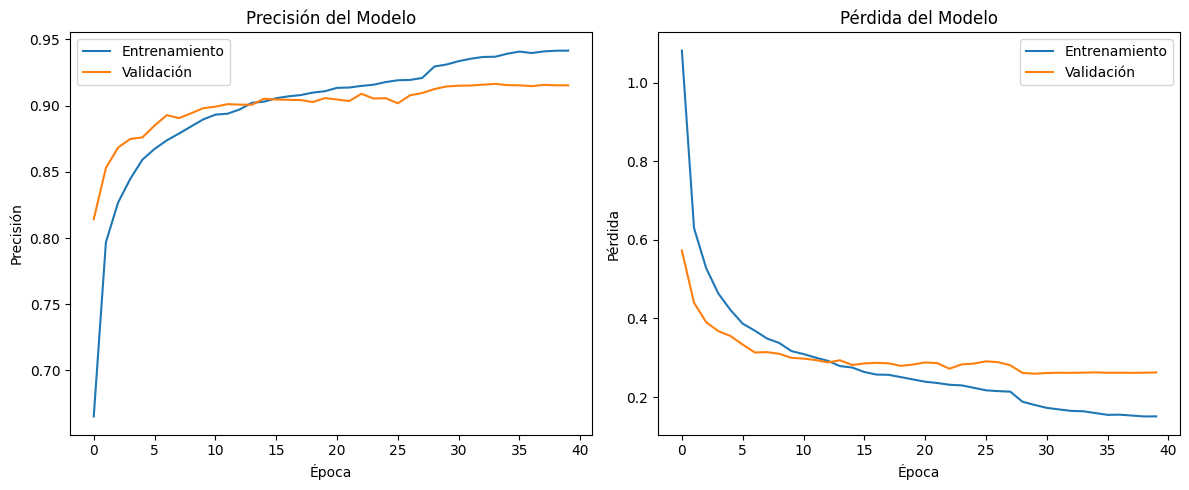

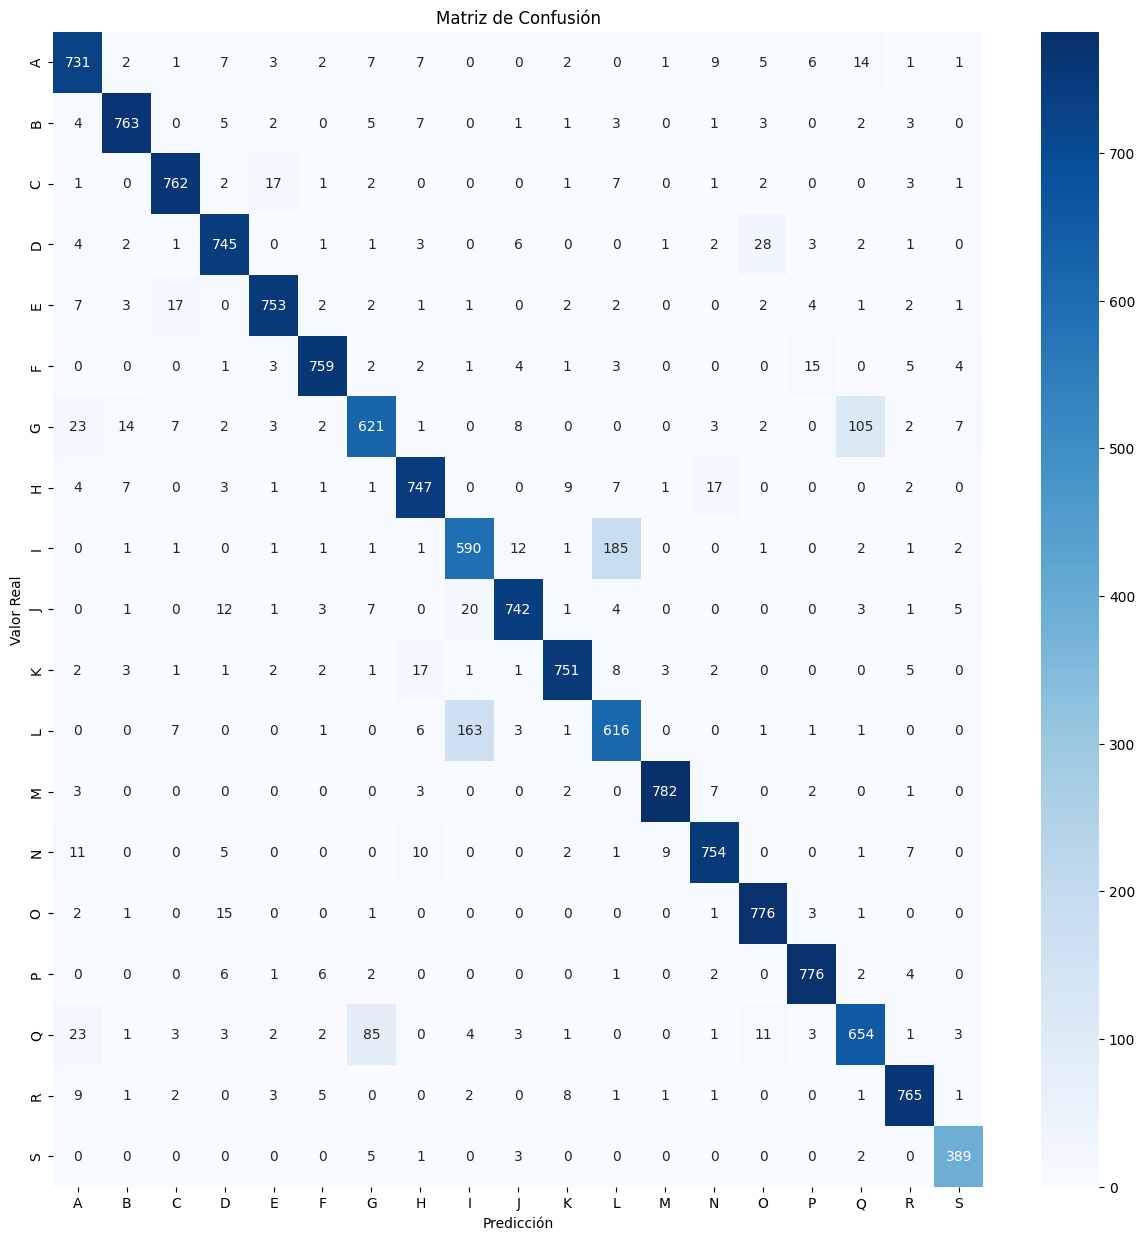


Ejemplos de predicciones:
Verdadera: C, Predicha: C
Verdadera: P, Predicha: P
Verdadera: R, Predicha: R
Verdadera: F, Predicha: F
Verdadera: F, Predicha: F
Verdadera: I, Predicha: I
Verdadera: F, Predicha: F
Verdadera: Q, Predicha: Q
Verdadera: B, Predicha: B
Verdadera: F, Predicha: F


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0] <= 19]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward (ajustado para 19 clases)
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(19, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=50,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")

Epoch 1/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4186 - loss: 2.1214 - val_accuracy: 0.7644 - val_loss: 0.9873 - learning_rate: 0.0010
Epoch 2/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6980 - loss: 1.1574 - val_accuracy: 0.8050 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 3/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7421 - loss: 1.0094 - val_accuracy: 0.8255 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 4/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7661 - loss: 0.9290 - val_accuracy: 0.8341 - val_loss: 0.7055 - learning_rate: 0.0010
Epoch 5/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7840 - loss: 0.8731 - val_accuracy: 0.8415 - val_loss: 0.6821 - learning_rate: 0.0010
Epoch 6/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7868 - loss: 0.8472 - val_accuracy: 0.8506 - val_loss: 0.6454 - learning_rate: 0.0010
Epoch 7/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7972 - loss: 0.8109 - 

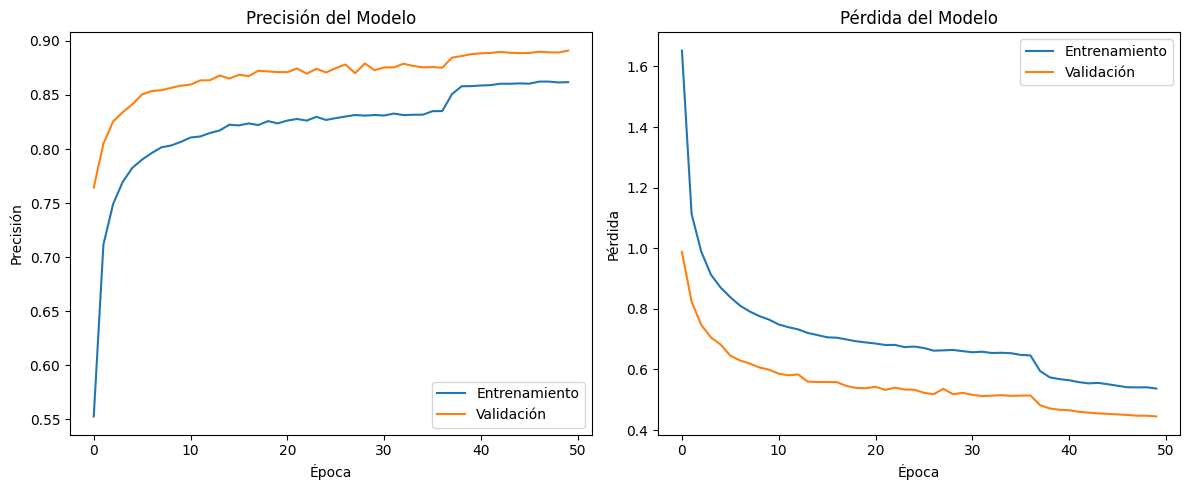

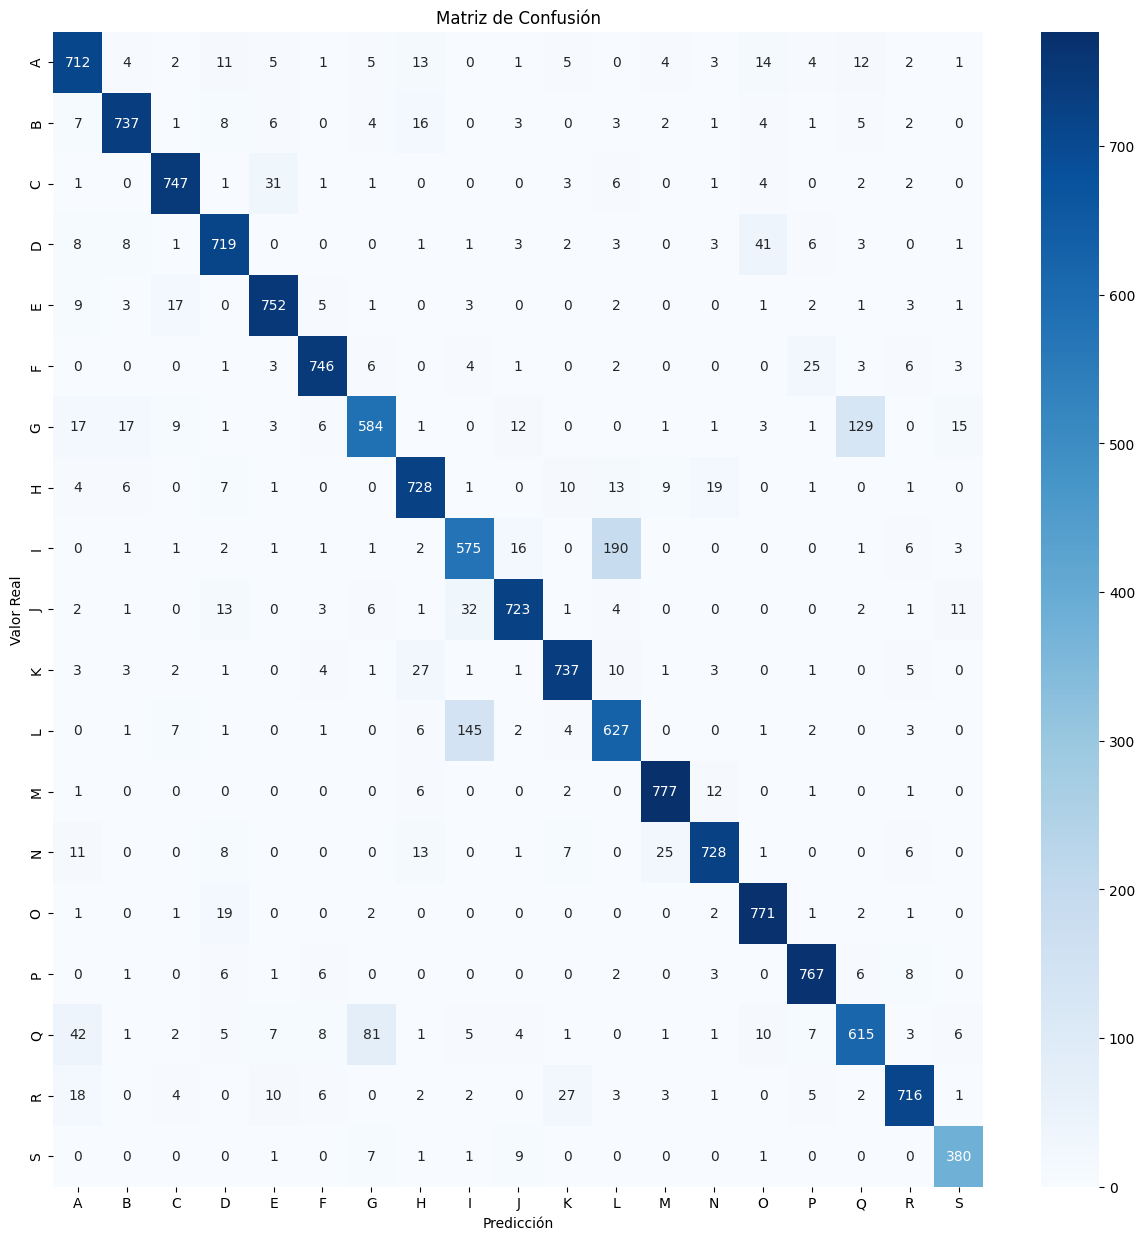


Ejemplos de predicciones:
Verdadera: D, Predicha: D
Verdadera: E, Predicha: E
Verdadera: C, Predicha: C
Verdadera: G, Predicha: G
Verdadera: P, Predicha: P
Verdadera: L, Predicha: L
Verdadera: S, Predicha: S
Verdadera: E, Predicha: E
Verdadera: D, Predicha: D
Verdadera: C, Predicha: C


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0] <= 19]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos y dar forma adecuada a las imágenes
X_train = X_train.reshape(-1, 28 * 28) / 255.0  # Cambiado a 28*28 para red feedforward
X_test = X_test.reshape(-1, 28 * 28) / 255.0    # Cambiado a 28*28 para red feedforward

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Convertir etiquetas a formato one-hot
y_train_encoded = to_categorical(y_train_encoded, num_classes=19)
y_val_encoded = to_categorical(y_val_encoded, num_classes=19)
y_test_encoded = to_categorical(y_test_encoded, num_classes=19)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),  # Entrada de 28*28
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(19, activation='softmax')  # 19 clases para A-S
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-7)

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    batch_size=128,
    epochs=50,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.5624 - loss: 2.4499 - val_accuracy: 0.8181 - val_loss: 1.3120 - learning_rate: 0.0010
Epoch 2/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7937 - loss: 1.3430 - val_accuracy: 0.8541 - val_loss: 1.0047 - learning_rate: 0.0010
Epoch 3/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8267 - loss: 1.0527 - val_accuracy: 0.8619 - val_loss: 0.8544 - learning_rate: 0.0010
Epoch 4/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8382 - loss: 0.9162 - val_accuracy: 0.8571 - val_loss: 0.8163 - learning_rate: 0.0010
Epoch 5/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8457 - loss: 0.8185 - val_accuracy: 0.8597 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 6/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8513 - loss: 0.7703 - val_accuracy: 0.8791 - val_loss: 0.6698 - learning_rate: 0.0010
Epoch 7/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8562

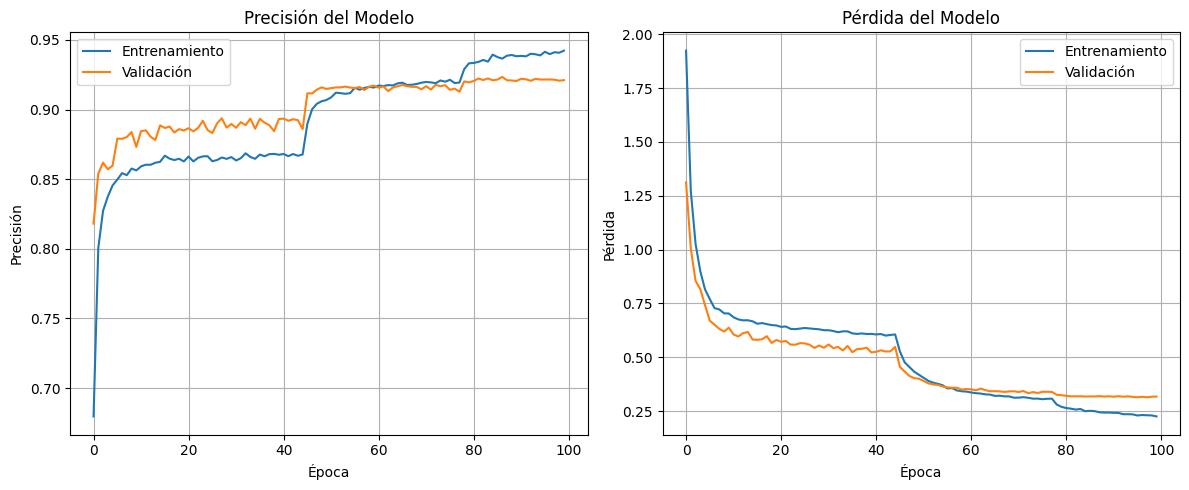

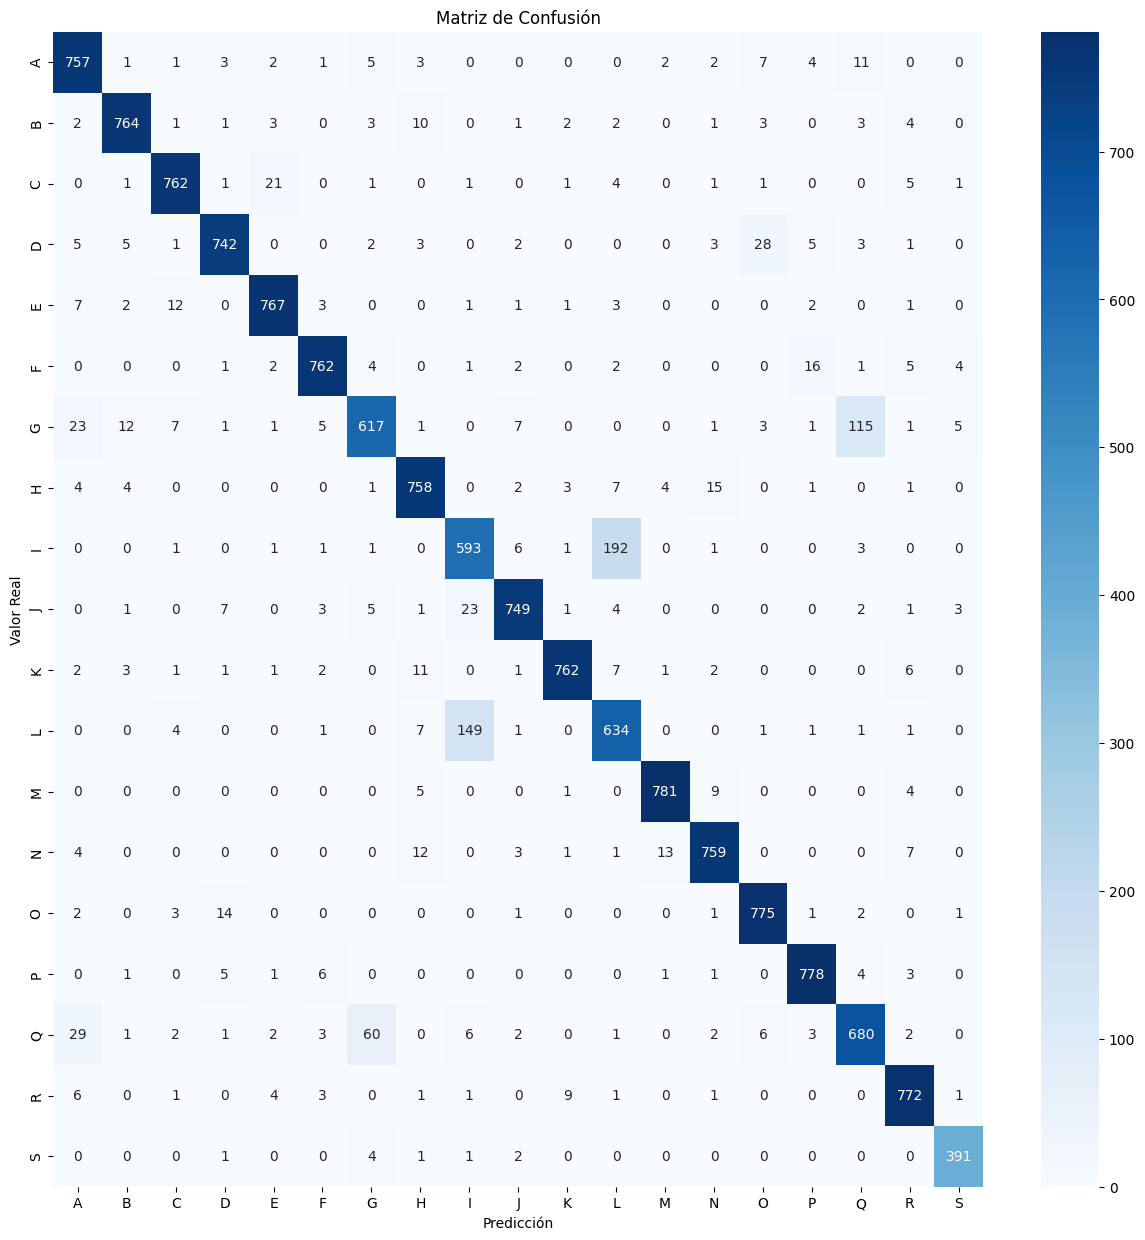


Ejemplos de predicciones:
Verdadera: L, Predicha: L
Verdadera: D, Predicha: D
Verdadera: J, Predicha: J
Verdadera: F, Predicha: F
Verdadera: Q, Predicha: A
Verdadera: E, Predicha: E
Verdadera: D, Predicha: D
Verdadera: B, Predicha: B
Verdadera: K, Predicha: K
Verdadera: K, Predicha: K


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0] <= 19]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(19, activation='softmax')  # 19 clases para A-S
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.4997 - loss: 2.7028 - val_accuracy: 0.8058 - val_loss: 1.3900 - learning_rate: 0.0010
Epoch 2/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7565 - loss: 1.4954 - val_accuracy: 0.8351 - val_loss: 1.0791 - learning_rate: 0.0010
Epoch 3/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7970 - loss: 1.1966 - val_accuracy: 0.8585 - val_loss: 0.9062 - learning_rate: 0.0010
Epoch 4/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8166 - loss: 1.0173 - val_accuracy: 0.8626 - val_loss: 0.8089 - learning_rate: 0.0010
Epoch 5/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8238 - loss: 0.9235 - val_accuracy: 0.8528 - val_loss: 0.7684 - learning_rate: 0.0010
Epoch 6/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8265 - loss: 0.8700 - val_accuracy: 0.8687 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 7/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8338

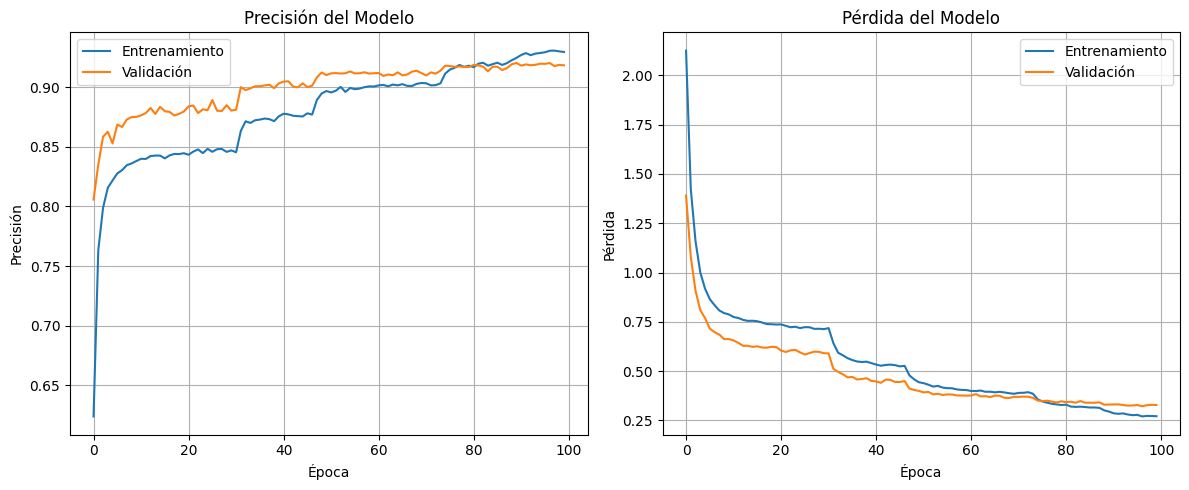

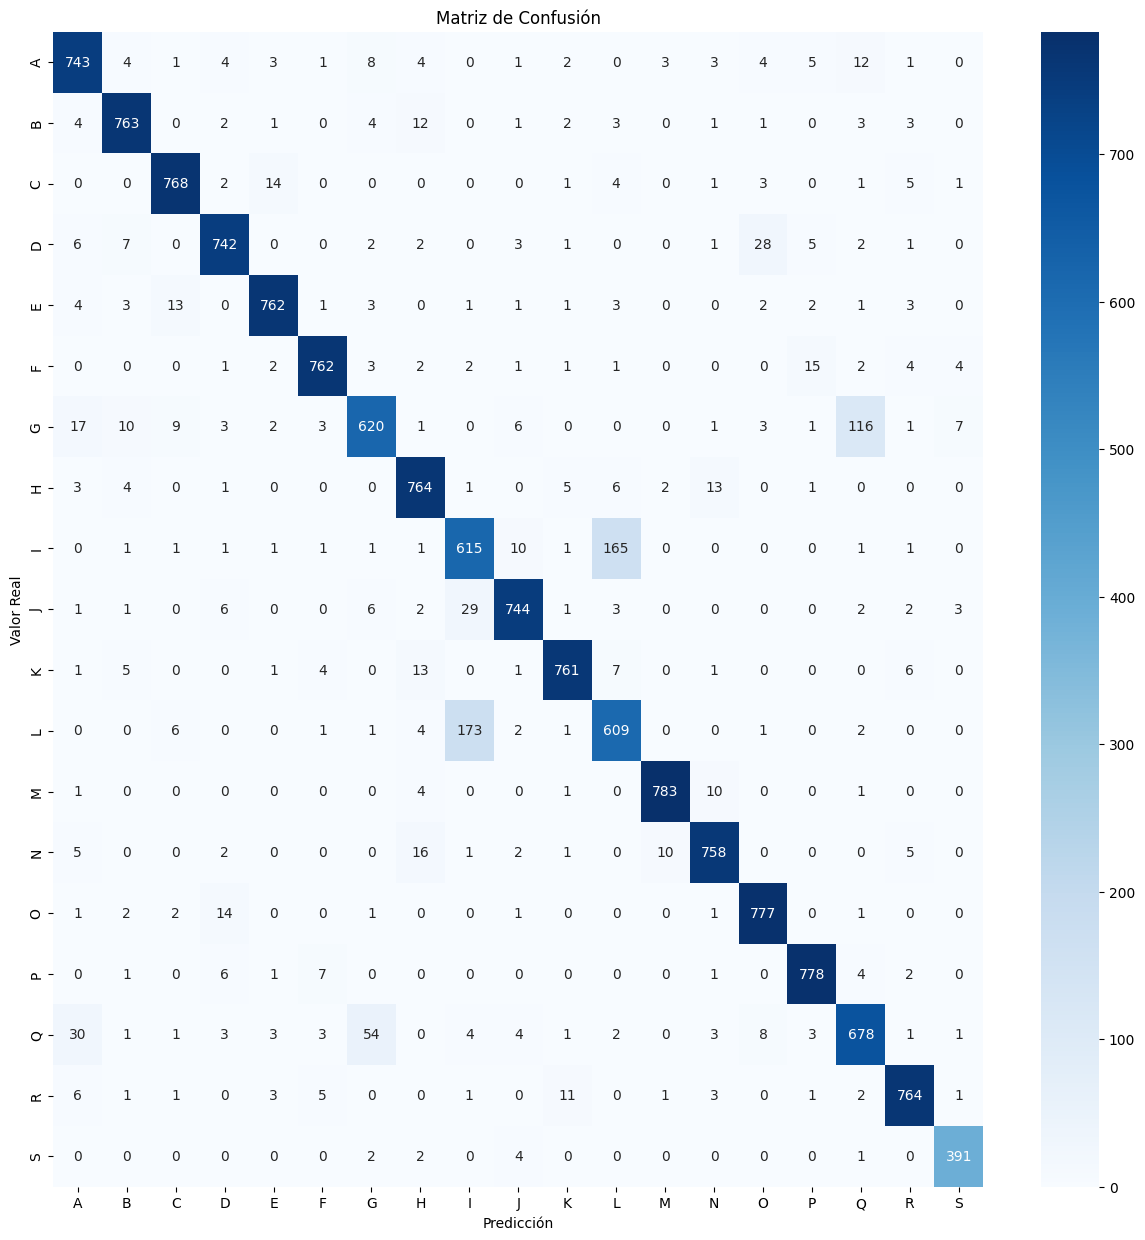


Ejemplos de predicciones:
Verdadera: J, Predicha: J
Verdadera: J, Predicha: J
Verdadera: R, Predicha: R
Verdadera: B, Predicha: B
Verdadera: Q, Predicha: Q
Verdadera: B, Predicha: B
Verdadera: H, Predicha: H
Verdadera: D, Predicha: D
Verdadera: A, Predicha: A
Verdadera: M, Predicha: M


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0] <= 19]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),  # Aumentar el dropout para reducir el sobreajuste
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(19, activation='softmax')  # 19 clases para A-S
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Cambiar el factor de reducción

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.5026 - loss: 2.6787 - val_accuracy: 0.7987 - val_loss: 1.4148 - learning_rate: 0.0010
Epoch 2/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7520 - loss: 1.5024 - val_accuracy: 0.8440 - val_loss: 1.0722 - learning_rate: 0.0010
Epoch 3/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7984 - loss: 1.1861 - val_accuracy: 0.8541 - val_loss: 0.9195 - learning_rate: 0.0010
Epoch 4/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8150 - loss: 1.0264 - val_accuracy: 0.8559 - val_loss: 0.8276 - learning_rate: 0.0010
Epoch 5/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8246 - loss: 0.9217 - val_accuracy: 0.8642 - val_loss: 0.7624 - learning_rate: 0.0010
Epoch 6/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8286 - loss: 0.8680 - val_accuracy: 0.8717 - val_loss: 0.7070 - learning_rate: 0.0010
Epoch 7/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8

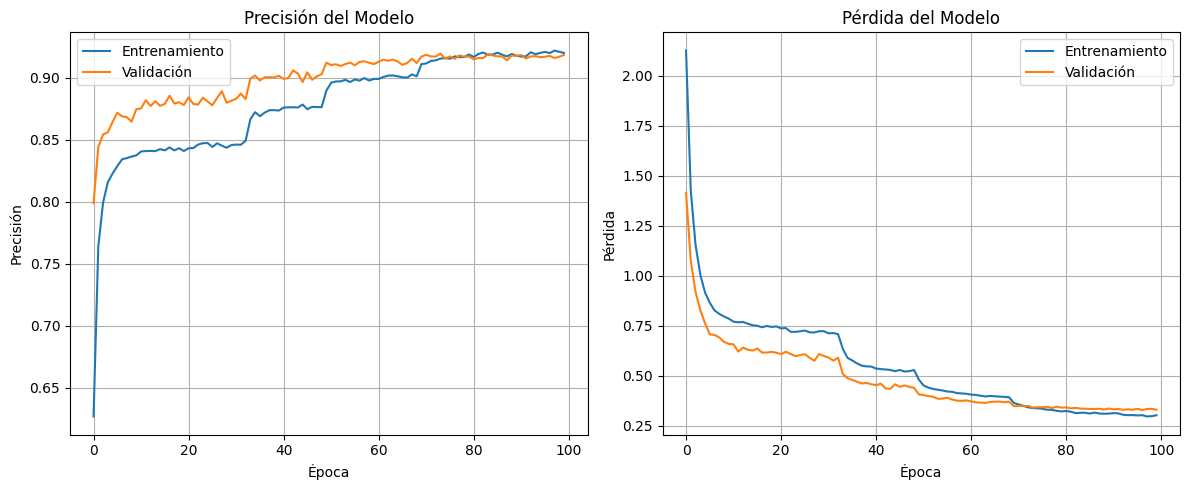

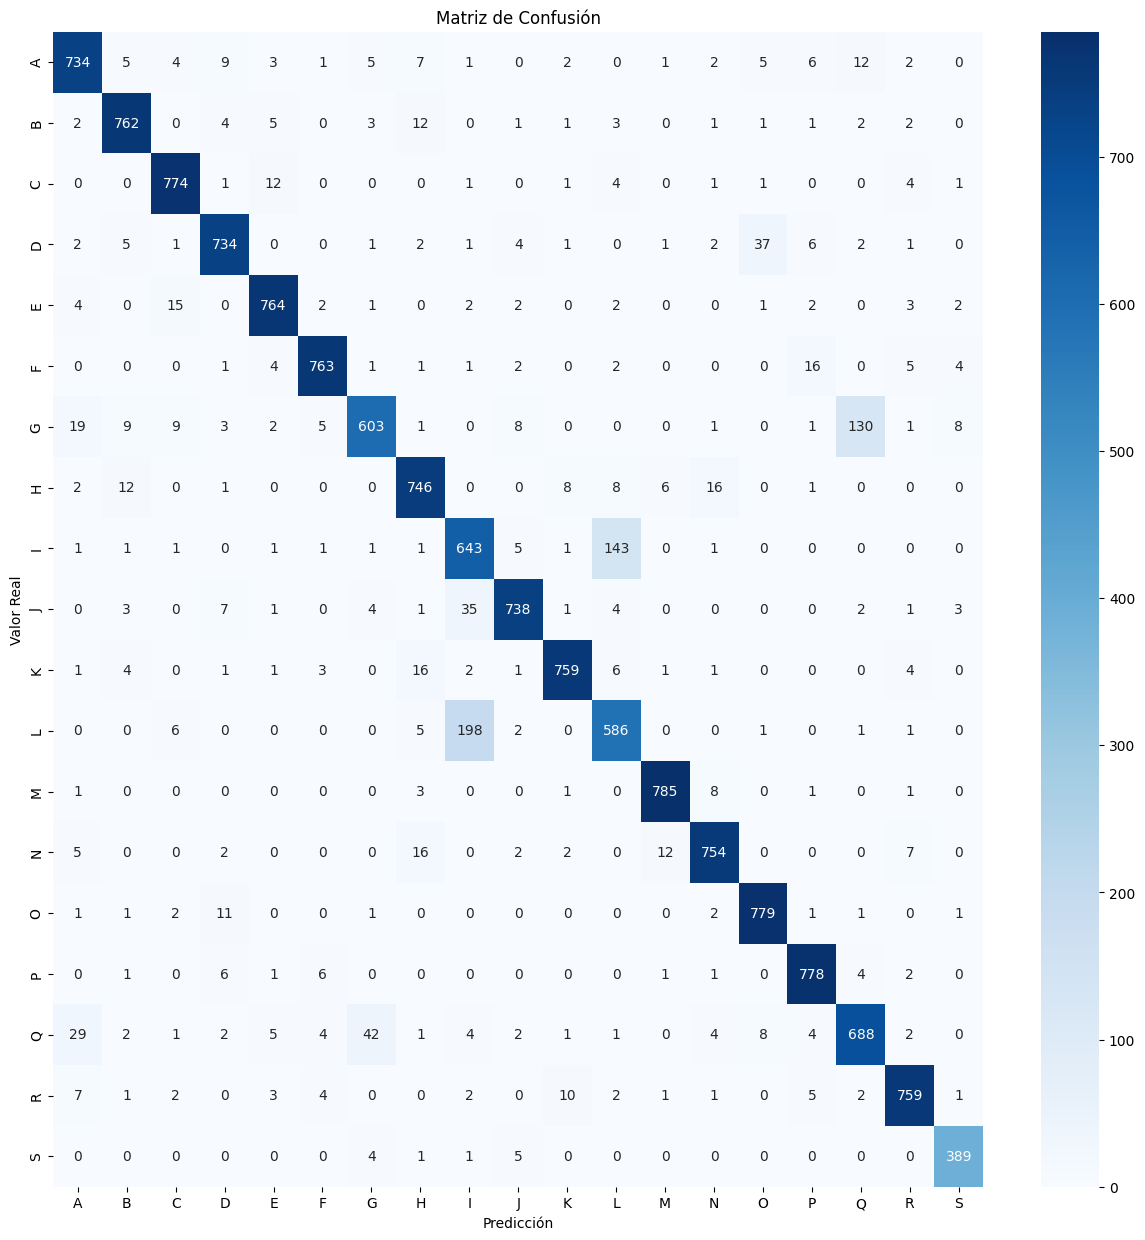


Ejemplos de predicciones:
Verdadera: E, Predicha: E
Verdadera: M, Predicha: M
Verdadera: S, Predicha: S
Verdadera: F, Predicha: F
Verdadera: H, Predicha: H
Verdadera: M, Predicha: M
Verdadera: Q, Predicha: Q
Verdadera: H, Predicha: H
Verdadera: J, Predicha: J
Verdadera: N, Predicha: N


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0] <= 19]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),  # Aumentar el dropout para reducir el sobreajuste
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(19, activation='softmax')  # 19 clases para A-S
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Cambiar el factor de reducción

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-S)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, pero nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a S
train_data = train_data[train_data.iloc[:, 0]]
test_data = test_data[test_data.iloc[:, 0] <= 19]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),  # Aumentar el dropout para reducir el sobreajuste
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(19, activation='softmax')  # 19 clases para A-S
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Cambiar el factor de reducción

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")


KeyError: "None of [Index([ 7, 16, 15, 23, 17, 13, 11, 22, 24, 10,\n       ...\n       14,  8,  6, 17, 19,  1, 21,  1, 23, 12],\n      dtype='int64', length=88799)] are in the [columns]"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.4815 - loss: 2.8292 - val_accuracy: 0.8097 - val_loss: 1.3470 - learning_rate: 0.0010
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7522 - loss: 1.4788 - val_accuracy: 0.8467 - val_loss: 1.0250 - learning_rate: 0.0010
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7948 - loss: 1.1776 - val_accuracy: 0.8560 - val_loss: 0.8812 - learning_rate: 0.0010
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8112 - loss: 1.0254 - val_accuracy: 0.8621 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.8201 - loss: 0.9487 - val_accuracy: 0.8641 - val_loss: 0.7677 - learning_rate: 0.0010
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8225 - loss: 0.9078 - val_accuracy: 0.8654 - val_loss: 0.7425 - learning_rate: 0.0010
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


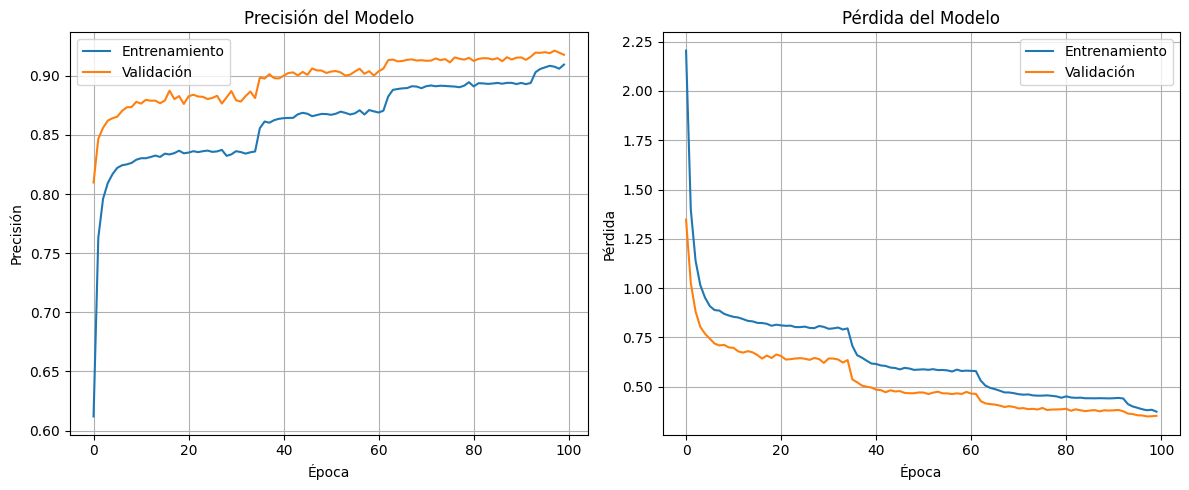

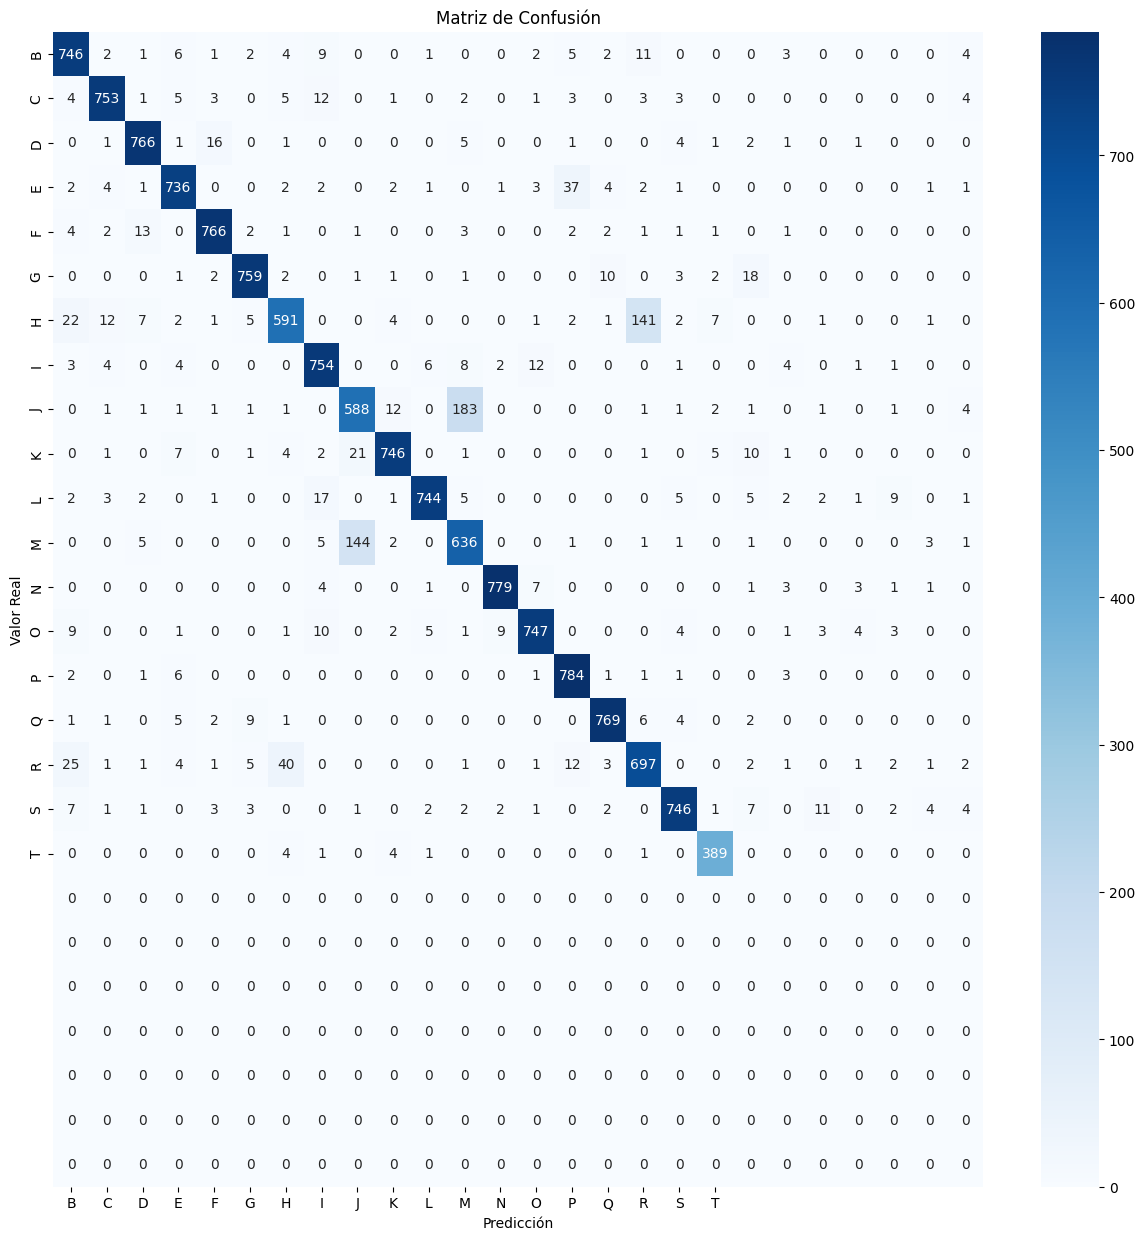


Ejemplos de predicciones:
Verdadera: S, Predicha: S
Verdadera: C, Predicha: C
Verdadera: J, Predicha: J
Verdadera: I, Predicha: I
Verdadera: G, Predicha: G
Verdadera: J, Predicha: M
Verdadera: C, Predicha: C
Verdadera: O, Predicha: O
Verdadera: L, Predicha: L
Verdadera: J, Predicha: J


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Función para convertir números a letras (ajustada para A-Z)
def num_to_letter(num):
    return chr(num + 65)  # A es 65 en ASCII, y nuestras etiquetas empiezan en 0

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a Z
train_data = train_data[train_data.iloc[:, 0] <= 26]  # Cambia 19 por 26 para A-Z
test_data = test_data[test_data.iloc[:, 0] <= 26]  # Cambia 19 por 26 para A-Z

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),  # Aumentar el dropout para reducir el sobreajuste
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(26, activation='softmax')  # 26 clases para A-Z
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Cambiar el factor de reducción

# Entrenar el modelo
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")


In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir el mapeo de índices a letras (A-Z)
index_to_letter = {i: chr(64 + i) for i in range(26)}

# Cargar y preprocesar los datos (X_train, X_val, X_test, y_train_encoded, y_val_encoded, y_test_encoded)
# Asegúrate de que los datos ya estén preprocesados (normalización, codificación de etiquetas, etc.)

# Crear un nuevo modelo más profundo y con más neuronas
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),  # Mayor dropout para combatir el sobreajuste
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(26, activation='softmax')  # 26 clases para A-Z
])

# Compilar el modelo con una tasa de aprendizaje ajustada
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Tasa de aprendizaje más pequeña
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks actualizados
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)  # Más paciencia para permitir mayor exploración
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Factor de reducción de LR ajustado

# Entrenar el modelo con mayor tamaño de batch
history = model.fit(
    X_train, y_train_encoded,
    epochs=150,
    batch_size=256,  # Aumentar el tamaño del batch
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación actualizado
print("\nInforme de clasificación actualizado:")
print(classification_report(y_test, predicted_letters))

# Crear y visualizar la matriz de confusión actualizada
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión Actualizada')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_train' is not defined

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Función para convertir números a letras (ajustada para A-Z)
def num_to_letter(num):
    return chr(num + 65)  # A es 65 en ASCII, y nuestras etiquetas empiezan en 0

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a Z (1 a 26 en el dataset)
train_data = train_data[train_data.iloc[:, 0] <= 26]
test_data = test_data[test_data.iloc[:, 0] <= 26]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos (escalar los valores de píxeles a [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo con varias capas, mayor dropout y regularización L2
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),  # Dropout para evitar el sobreajuste
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(26, activation='softmax')  # 26 clases para las letras A-Z
])

# Compilar el modelo con una tasa de aprendizaje baja
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Tasa de aprendizaje más baja
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks: EarlyStopping y ReduceLROnPlateau para ajustar la tasa de aprendizaje y detener el entrenamiento cuando sea necesario
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)  # Detiene el entrenamiento si no hay mejora en 15 épocas
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Reduce la tasa de aprendizaje si no hay mejora en 5 épocas

# Entrenar el modelo con los datos de entrenamiento y validación
history = model.fit(
    X_train, y_train_encoded,
    epochs=150,
    batch_size=256,  # Aumentar el tamaño del batch para mejorar la convergencia
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],  # Utilizar los callbacks
    verbose=1  # Mostrar información detallada durante el entrenamiento
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación detallado
print("\nInforme de clasificación:")
print(classification_report(y_test_encoded, predicted_indices))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test_encoded, predicted_indices)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[chr(i) for i in range(65, 91)],  # Etiquetas en el eje x (letras A-Z)
            yticklabels=[chr(i) for i in range(65, 91)])  # Etiquetas en el eje y (letras A-Z)
plt.title('Matriz de Confusión Actualizada')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test_encoded), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {index_to_letter[y_test_encoded[i]]}, Predicha: {predicted_letters[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.2283 - loss: 5.0144 - val_accuracy: 0.6743 - val_loss: 2.8997 - learning_rate: 5.0000e-04
Epoch 2/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.5866 - loss: 3.0536 - val_accuracy: 0.7832 - val_loss: 2.2098 - learning_rate: 5.0000e-04
Epoch 3/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.6970 - loss: 2.4505 - val_accuracy: 0.8264 - val_loss: 1.8398 - learning_rate: 5.0000e-04
Epoch 4/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.7534 - loss: 2.0495 - val_accuracy: 0.8474 - val_loss: 1.5821 - learning_rate: 5.0000e-04
Epoch 5/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 55s 147ms/step - accuracy: 0.7829 - loss: 1.7681 - val_accuracy: 0.8615 - val_loss: 1.3785 - learning_rate: 5.0000e-04
Epoch 6/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.8103 - loss: 1.5319 - val_accuracy: 0.8724 - val_loss: 1.2134 - learning_rate: 5.0000e-04
Epoch 7/150
 10/278 ━━━━━━━━━━━━━━━━━━━━ 48s

KeyboardInterrupt: 